## Civic Analytics & Urban Intelligence Problemset #1

ID: rls672

Date: October 10, 2017

### 1. Identify the Problem

##### Background

NYC is home to over 600,000 street trees. 311, NYC's non-emergency service number, received over 67,000 calls in 2016 related to trees. These fell into six categories:
- Damaged Tree: 23,453
- New Tree Request: 18,048
- Overgrown Tree/Branches: 12,505
- Dead/Dying Tree: 10,110
- Illegal Tree Damage: 2,908
- Dead Tree: 340

The number of trees is increasing in NYC, and consequently, the number of 311 requests related to trees will likely also continue to increase. There is an opportunity to decrease the number of tree-related 311 requests being made by better understanding trends and what may be prompting calls, allowing the Department of Parks & Recreation (DPR) to provide more preventative services. By understanding where and why service requests are coming in from, both DPR and 311 can save time (and money) by providing proactive rather than reactive services.

Here, we will focus mainly on the top two requets, as they account for nearly 2/3 of the calls. (Damaged Tree & New Tree Request)

##### Data Inventory

| Data | Year | Description | Source |
|:----:|:----:|:-----------:|:------:|
| 311  | 2016 | 311 requests from 2016 pertaining to trees | NYC Open Data Portal |
| NYC Tree Census | 2015 | Count & description of all street trees in NYC | NYC Open Data Portal |

##### Problem Description / Opportunity

The goal of this project is to attempt to understand if certain variables of trees (number of trees, stewardship) correlate to the number/type of 311 service requests. 

### 2. Descriptive Statistics

##### Getting & Cleaning Data

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
import calendar
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Reading and Cleaning 311 Data
df_311 = pd.read_csv("2016_311_Requests.csv")
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,33717792,06/29/2016 01:08:19 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11355.0,137-07 NEGUNDO AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.747526,-73.817632,"(40.7475256857676, -73.81763223610976)"
1,33722506,06/29/2016 01:10:00 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11355.0,137-11 NEGUNDO AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.747526,-73.817632,"(40.7475256857676, -73.81763223610976)"
2,33819296,07/12/2016 01:21:25 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11358.0,29-36 160 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.770829,-73.804463,"(40.77082897451399, -73.80446304744636)"
3,33929707,07/25/2016 08:58:39 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11354.0,25-11 157 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.774911,-73.806708,"(40.774911453130954, -73.8067076335726)"
4,33074959,04/06/2016 12:19:18 PM,09/27/2017 02:01:17 PM,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Dead Branches in Tree,Street,11360.0,27-26 200 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773086,-73.791055,"(40.77308632367185, -73.7910545414687)"


In [3]:
#Printing all the column names so I can decide what ones to drop 
df_311.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [4]:
#Dropping 311 columns that are not needed
df_311.drop(['Agency', 'Landmark', 'Facility Type',
             'Community Board', 'School Name',
             'School Number', 'School Region', 'School Code',
             'School Phone Number', 'School Address', 'School City',
             'Park Facility Name', 'Park Borough',
             'Due Date', 'Intersection Street 1', 
             'Intersection Street 2', 'Cross Street 1', 
             'Cross Street 2',
             'School State', 'School Zip', 'School Not Found',
             'School or Citywide Complaint', 'Vehicle Type',
             'Taxi Company Borough', 'Taxi Pick Up Location',
             'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
             'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
             'Ferry Terminal Name', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)'], axis=1, inplace=True)

In [5]:
#Narrowing down the types of complaints 
complaints = ('New Tree Request', 
              'Overgrown Tree/Branches', 
              'Dead/Dying Tree',
              'Damaged Tree', 
              'Dead Tree', 
              'Illegal Tree Damage')
df_311 = df_311[df_311['Complaint Type'].isin(complaints)]

In [6]:
df_311.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Address Type                       object
City                               object
Status                             object
Resolution Description             object
Resolution Action Updated Date     object
Borough                            object
Latitude                          float64
Longitude                         float64
Location                           object
dtype: object

In [7]:
#Changing the zip codes to integars to get rid of 0 
df_311['Incident Zip'] = df_311['Incident Zip'].values.astype(np.int64)

In [8]:
#Removing all 311 calls related to parks
df_311 = df_311[df_311['Location Type'] != 'Park']

In [9]:
#Dropping zipcodes that do not make sense 
df_311 = df_311[df_311['Incident Zip'] != 83]
df_311 = df_311[df_311['Incident Zip'] != -9223372036854775808]
df_311 = df_311[df_311['Incident Zip'] != 0]
df_311 = df_311[df_311['Incident Zip'] != 10000]

In [10]:
df_311.head(20)

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Resolution Action Updated Date,Borough,Latitude,Longitude,Location
0,33717792,06/29/2016 01:08:19 PM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11355,137-07 NEGUNDO AVENUE,NEGUNDO AVENUE,ADDRESS,FLUSHING,Assigned,The location has been inspected and is schedul...,12/19/2016 07:00:42 AM,QUEENS,40.747526,-73.817632,"(40.7475256857676, -73.81763223610976)"
1,33722506,06/29/2016 01:10:00 PM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11355,137-11 NEGUNDO AVENUE,NEGUNDO AVENUE,ADDRESS,FLUSHING,Assigned,The location has been inspected and is schedul...,10/31/2016 03:00:26 PM,QUEENS,40.747526,-73.817632,"(40.7475256857676, -73.81763223610976)"
2,33819296,07/12/2016 01:21:25 PM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11358,29-36 160 STREET,160 STREET,ADDRESS,FLUSHING,Assigned,The location has been inspected and is schedul...,12/14/2016 10:00:03 AM,QUEENS,40.770829,-73.804463,"(40.77082897451399, -73.80446304744636)"
3,33929707,07/25/2016 08:58:39 PM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11354,25-11 157 STREET,157 STREET,ADDRESS,FLUSHING,Assigned,The location has been inspected and is schedul...,12/14/2016 10:00:05 AM,QUEENS,40.774911,-73.806708,"(40.774911453130954, -73.8067076335726)"
4,33074959,04/06/2016 12:19:18 PM,09/27/2017 02:01:17 PM,Department of Parks and Recreation,Overgrown Tree/Branches,Dead Branches in Tree,Street,11360,27-26 200 STREET,200 STREET,ADDRESS,BAYSIDE,Closed,The Department of Parks and Recreation has det...,09/27/2017 02:01:17 PM,QUEENS,40.773086,-73.791055,"(40.77308632367185, -73.7910545414687)"
5,33855630,07/16/2016 02:15:18 PM,NaN,Department of Parks and Recreation,Dead/Dying Tree,Planted More Than 2 Years Ago,Street,11414,89-19 164 AVENUE,164 AVENUE,ADDRESS,HOWARD BEACH,Assigned,The Department of Parks and Recreation has ins...,09/27/2017 09:40:44 AM,QUEENS,40.650322,-73.841297,"(40.65032172624397, -73.84129723839533)"
6,34177953,08/26/2016 11:58:00 AM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11215,211 9 STREET,9 STREET,ADDRESS,BROOKLYN,Assigned,The location has been inspected and is schedul...,12/30/2016 01:00:17 PM,BROOKLYN,40.670943,-73.989921,"(40.67094251841431, -73.98992075323933)"
7,34605734,10/23/2016 01:11:40 PM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11215,211A 9 STREET,9 STREET,ADDRESS,BROOKLYN,Assigned,The location has been inspected and is schedul...,12/12/2016 12:00:20 PM,BROOKLYN,40.670943,-73.989921,"(40.67094251841431, -73.98992075323933)"
8,33702172,06/27/2016 09:27:03 AM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11358,158-07 OAK AVENUE,OAK AVENUE,ADDRESS,FLUSHING,Assigned,The location has been inspected and is schedul...,11/09/2016 04:00:22 PM,QUEENS,40.750245,-73.808732,"(40.75024502516137, -73.80873177142168)"
9,33715283,06/29/2016 12:46:30 PM,NaN,Department of Parks and Recreation,New Tree Request,For One Address,Street,11361,200-32 45 AVENUE,45 AVENUE,ADDRESS,BAYSIDE,Assigned,The location has been inspected and is schedul...,11/09/2016 04:00:30 PM,QUEENS,40.756873,-73.782020,"(40.756872815997866, -73.78202018359029)"


##### Reading and Cleaning Tree Data

In [11]:
df_tree = pd.read_csv("2015_Street_Tree_Census.csv")
df_tree.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [12]:
#Reading all columns to decide what to drop 
df_tree.columns

Index([u'tree_id', u'block_id', u'created_at', u'tree_dbh', u'stump_diam',
       u'curb_loc', u'status', u'health', u'spc_latin', u'spc_common',
       u'steward', u'guards', u'sidewalk', u'user_type', u'problems',
       u'root_stone', u'root_grate', u'root_other', u'trunk_wire',
       u'trnk_light', u'trnk_other', u'brch_light', u'brch_shoe',
       u'brch_other', u'address', u'postcode', u'zip_city', u'community board',
       u'borocode', u'borough', u'cncldist', u'st_assem', u'st_senate', u'nta',
       u'nta_name', u'boro_ct', u'state', u'latitude', u'longitude', u'x_sp',
       u'y_sp', u'council district', u'census tract', u'bin', u'bbl'],
      dtype='object')

In [13]:
#Dropping unneeded columns 
df_tree.drop(['spc_latin', 'x_sp', 'y_sp', 'bin', 'bbl', 'st_senate', 'st_assem', 'boro_ct',
             'state', 'nta_name', 'nta', 'council district', 'borocode', 'census tract',
             'block_id', 'address', 'zip_city', 'created_at', 'user_type'], axis=1, inplace=True)

In [14]:
#Dropping zipcodes that do not make sense 
df_tree = df_tree[df_tree.postcode != 83]

In [15]:
df_tree.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,...,trnk_other,brch_light,brch_shoe,brch_other,postcode,community board,borough,cncldist,latitude,longitude
0,180683,3,0,OnCurb,Alive,Fair,red maple,None,None,NoDamage,...,No,No,No,No,11375,406,Queens,29,40.723092,-73.844215
1,200540,21,0,OnCurb,Alive,Fair,pin oak,None,None,Damage,...,No,No,No,No,11357,407,Queens,19,40.794111,-73.818679
2,204026,3,0,OnCurb,Alive,Good,honeylocust,1or2,None,Damage,...,No,No,No,No,11211,301,Brooklyn,34,40.717581,-73.936608
3,204337,10,0,OnCurb,Alive,Good,honeylocust,None,None,Damage,...,No,No,No,No,11211,301,Brooklyn,34,40.713537,-73.934456
4,189565,21,0,OnCurb,Alive,Good,American linden,None,None,Damage,...,No,No,No,No,11215,306,Brooklyn,39,40.666778,-73.975979


##### Grouping both trees and calls by zipcode to get count of calls per zip code

In [16]:
callszip = df_311.groupby('Incident Zip').count()
callszip.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Resolution Action Updated Date,Borough,Latitude,Longitude,Location
Incident Zip,,,,,,,,,,,,,,,,,,
10001,76,76,24,76,76,76,64,73,73,76,76,76,74,66,76,74,74,74
10002,204,204,121,204,204,204,156,188,188,204,204,204,204,170,204,202,202,202
10003,384,384,181,384,384,384,354,372,372,384,384,384,381,293,384,384,384,384
10004,4,4,2,4,4,4,1,3,3,4,4,4,4,3,4,4,4,4
10005,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2


In [17]:
treeszip = df_tree.groupby('postcode').count()
treeszip.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,...,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,community board,borough,cncldist,latitude,longitude
postcode,,,,,,,,,,,,,,,,,,,,,
10001,911,911,911,911,911,850,850,850,850,850,...,911,911,911,911,911,911,911,911,911,911
10002,2265,2265,2265,2265,2265,2158,2159,2158,2158,2158,...,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265
10003,2025,2025,2025,2025,2025,1943,1943,1943,1943,1943,...,2025,2025,2025,2025,2025,2025,2025,2025,2025,2025
10004,118,118,118,118,118,117,117,117,117,117,...,118,118,118,118,118,118,118,118,118,118
10005,144,144,144,144,144,130,130,130,130,130,...,144,144,144,144,144,144,144,144,144,144


In [18]:
#Replacing the string in steward with numeric values
df_tree['steward'] = df_tree['steward'].replace(['None', '1or2', '3or4', '4orMore'], 
                     [0, 1, 2, 3])

In [19]:
#Creating a df that is just requests for damaged trees
df_311_damagedtrees = df_311[df_311['Complaint Type'] == 'Damaged Tree']
df_311_damagedtrees_zip = df_311_damagedtrees.groupby('Incident Zip').count()

In [20]:
#Creating a df that is just requests for new trees
df_311_newtrees = df_311[df_311['Complaint Type'] == 'New Tree Request']
df_311_newtrees_zip = df_311_newtrees.groupby('Incident Zip').count()

In [21]:
#df looking at average steward scores
df_tree_steward = df_tree.groupby('postcode').mean()
df_tree_steward.head()

,tree_id,tree_dbh,stump_diam,steward,community board,cncldist,latitude,longitude
postcode,,,,,,,,
10001,173602.698134,7.082327,0.226125,0.485882,104.241493,3.042810,40.750276,-73.999179
10002,188191.372185,8.237528,0.057837,0.331325,103.000000,1.144812,40.716308,-73.988244
10003,133593.780247,8.802469,0.181235,0.780751,103.854815,1.966420,40.731846,-73.988227
10004,232955.855932,6.601695,0.211864,0.649573,101.000000,1.000000,40.703616,-74.012946
10005,235362.388889,5.840278,0.263889,0.407692,101.000000,1.000000,40.704810,-74.007459


##### Intial Stats

In [22]:
#Counts complaint types
complaints = df_311['Complaint Type'].value_counts()
complaints

Damaged Tree               23452
New Tree Request           18048
Overgrown Tree/Branches    12505
Dead/Dying Tree            10110
Illegal Tree Damage         2908
Dead Tree                    340
Name: Complaint Type, dtype: int64

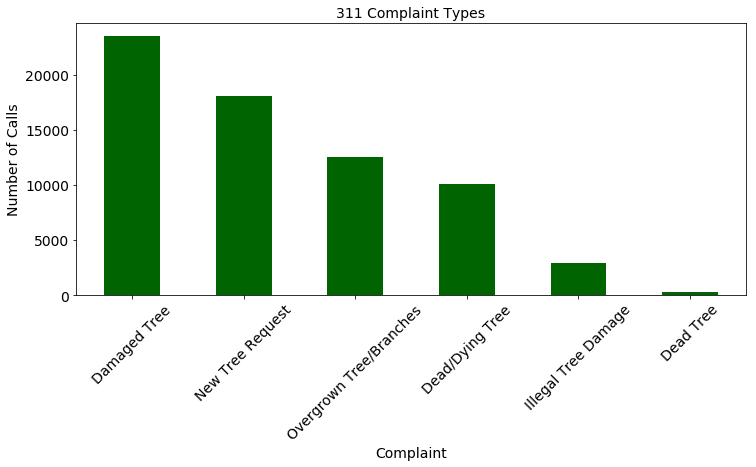

In [23]:
ax=complaints.plot(kind="bar", figsize=(12,5), fontsize=14, color="darkgreen")
plt.xticks(rotation=45)
plt.title("311 Complaint Types", fontsize=14)
plt.xlabel("Complaint", fontsize=14)
plt.ylabel("Number of Calls", fontsize=14)

#### Fig 1. This plot shows the most frequency of different 311 tree-related request types

In [24]:
#Convert dates to datetime 
df_311['Created Date'] = pd.to_datetime(df_311['Created Date'])

In [25]:
df_311['Month'] = df_311['Created Date'].dt.month

In [26]:
df_311_month = df_311.groupby('Month').count()
df_311_month = df_311_month['Unique Key']

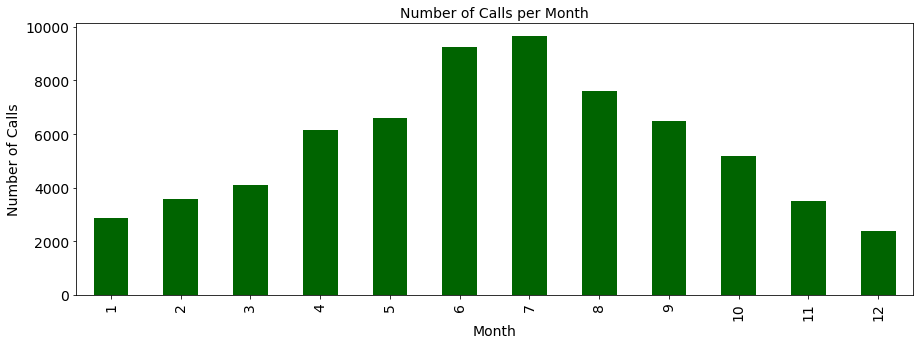

In [27]:
ax1=df_311_month.plot(kind="bar", color="darkgreen", figsize=(15,5), fontsize=14)
ax1.set_xlabel("Month", fontsize=14)
ax1.set_ylabel("Number of Calls", fontsize=14)
ax1.set_title("Number of Calls per Month", fontsize=14)

#### Fig 2. The number of 311 calls regarding trees per month peaks in the summer months (June, July, August). 

In [28]:
#Total number of trees per borough
df_tree['borough'].value_counts()

Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         64488
Name: borough, dtype: int64

In [29]:
#Total number of calls per borough
df_311['Borough'].value_counts()

QUEENS           24463
BROOKLYN         22871
MANHATTAN         6864
STATEN ISLAND     6783
BRONX             6382
Name: Borough, dtype: int64

In [30]:
#Status of Trees
#Not going to look further at this, as nearly all trees fall into one category
df_tree['status'].value_counts()

Alive    651241
Stump     17653
Dead      13959
Name: status, dtype: int64

In [31]:
#Health of Trees
#Not going to look further at this, as nearly all trees fall into one category
df_tree['health'].value_counts()

Good    527965
Fair     96465
Poor     26810
Name: health, dtype: int64

In [32]:
#Location of Trees
#Not going to look further at this, as nearly all trees fall into one category
df_tree['curb_loc'].value_counts()

OnCurb            656373
OffsetFromCurb     26480
Name: curb_loc, dtype: int64

In [33]:
#Guards around Trees
#Not going to look further at this, as nearly all trees fall into one category
df_tree['guards'].value_counts()

None       571487
Helpful     51753
Harmful     20252
Unsure       7748
Name: guards, dtype: int64

In [34]:
calls_std = np.std(callszip['Unique Key'])
print("Standard deviation per zip code:", int(calls_std))

Standard deviation per zip code: 307


In [35]:
calls_mean = np.mean(callszip['Unique Key'])
print("Mean Number of Calls per Zip Code:", int(calls_mean))

Mean Number of Calls per Zip Code: 354


##### Ratio of Calls Per Tree

In [36]:
totalcalls = (df_311['Unique Key'].count())
totaltrees = (df_tree['tree_id'].count())
totalratio = (float(totalcalls) / float(totaltrees))
print('Total Calls: ', totalcalls)
print('Total Trees: ', totaltrees)
print('Number of Calls per Tree (City-Wide Average): ', '{0:.5f}'.format(totalratio))

Total Calls:  67363
Total Trees:  682853
Number of Calls per Tree (City-Wide Average):  0.09865


In [37]:
#Combine and drop rows with NaN
calls_per_tree = pd.concat([treeszip['tree_id'],callszip['Unique Key']], axis=1)
calls_per_tree.columns = ['Number of Trees', 'Number of Calls']
calls_per_tree = calls_per_tree.dropna()

In [38]:
calls_per_tree.head(10)

,Number of Trees,Number of Calls
10001,911.0,76.0
10002,2265.0,204.0
10003,2025.0,384.0
10004,118.0,4.0
10005,144.0,2.0
10006,53.0,3.0
10007,355.0,29.0
10009,1924.0,308.0
10010,889.0,75.0
10011,2134.0,351.0


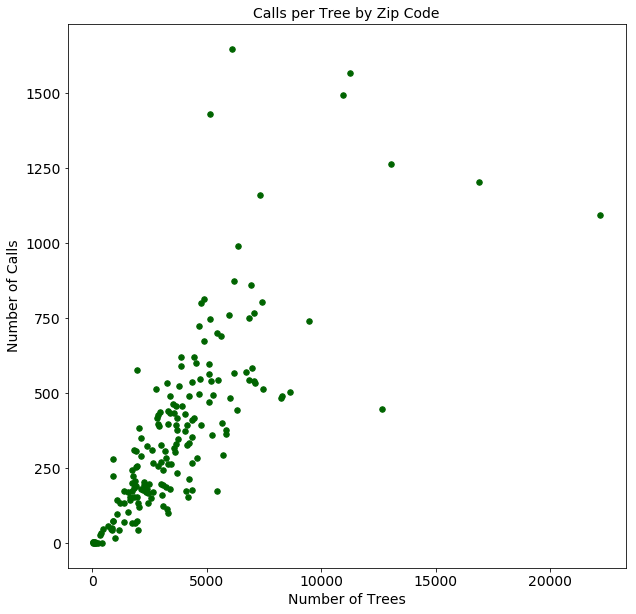

In [39]:
ax1 = calls_per_tree.plot(x='Number of Trees', y='Number of Calls', 
                          kind="scatter", color="darkgreen", figsize=(10,10), fontsize=14, s=30)
ax1.set_title("Calls per Tree by Zip Code", fontsize=14)
ax1.set_xlabel("Number of Trees", fontsize=14)
ax1.set_ylabel("Number of Calls", fontsize=14)

#### Fig 3. This plot demonstrates that in the majority of zip codes, the number of calls is proportional to the nubmer of trees. However, it demonstrates that there are some zip codes that are more extreme and make noticeably more/less calls per tree.

In [40]:
calls_per_tree['Calls Per Tree'] = (calls_per_tree['Number of Calls'] / calls_per_tree['Number of Trees'])
calls_per_tree.head(10)

,Number of Trees,Number of Calls,Calls Per Tree
10001,911.0,76.0,0.083425
10002,2265.0,204.0,0.090066
10003,2025.0,384.0,0.189630
10004,118.0,4.0,0.033898
10005,144.0,2.0,0.013889
10006,53.0,3.0,0.056604
10007,355.0,29.0,0.081690
10009,1924.0,308.0,0.160083
10010,889.0,75.0,0.084364
10011,2134.0,351.0,0.164480


#### It is fairly logical that as the number of trees increases, the number of calls would also increase. Therefore, it is useful to instead look at the ratio of calls per tree in every zip code. 

In [41]:
#Looking at zip codes that have an above average number of calls per tree 
topzips = calls_per_tree[calls_per_tree['Calls Per Tree'] > totalratio]
topzips.head(10)

,Number of Trees,Number of Calls,Calls Per Tree
10003,2025.0,384.0,0.189630
10009,1924.0,308.0,0.160083
10011,2134.0,351.0,0.164480
10012,1076.0,143.0,0.132900
10013,1202.0,133.0,0.110649
10014,2591.0,312.0,0.120417
10016,1872.0,209.0,0.111645
10018,485.0,49.0,0.101031
10019,1715.0,176.0,0.102624
10021,1959.0,578.0,0.295048


In [42]:
topzips2 = pd.DataFrame(calls_per_tree['Calls Per Tree'].nlargest(n=50))

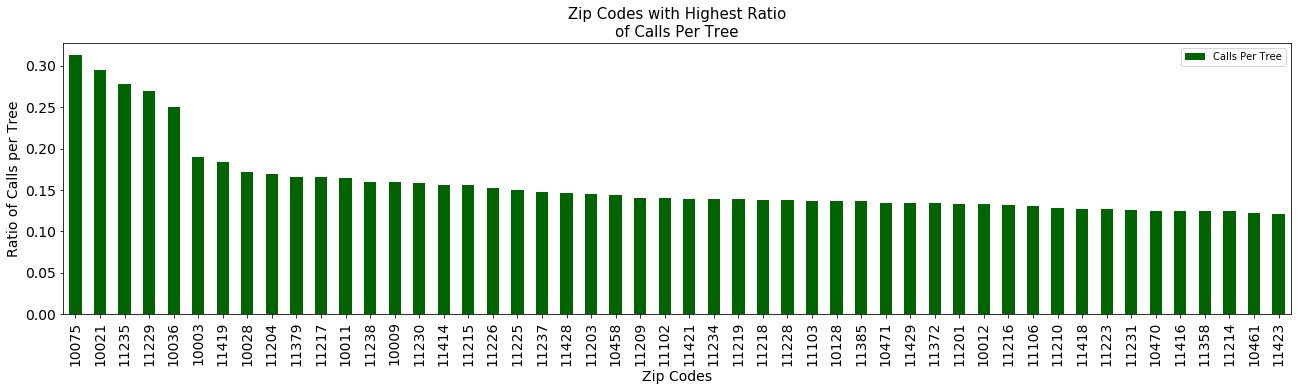

In [43]:
ax2 = topzips2.plot(kind='bar', figsize=(22,5), color="darkgreen", fontsize=14)
ax2.set_title("Zip Codes with Highest Ratio\nof Calls Per Tree", fontsize=15)
ax2.set_xlabel("Zip Codes", fontsize=14)
ax2.set_ylabel("Ratio of Calls per Tree", fontsize=14)

#### Fig 4. This plot shows the ratio of calls per tree. The overall average for the city is 0.09996. The top fifty zip codes shown here are all above that mean. In particular, in shows that five zip codes are particularly higher than the rest. DPR should pay special attention to those zip codes. Intriguingly, the top two zip codes are both on the Upper East Side of Manhattan (10075 & 10021). The next two are located next to each other in southern Brooklyn (11235 & 11229). The fifth is located in Midtown Manhattan (10036). 

### 3. Visualization

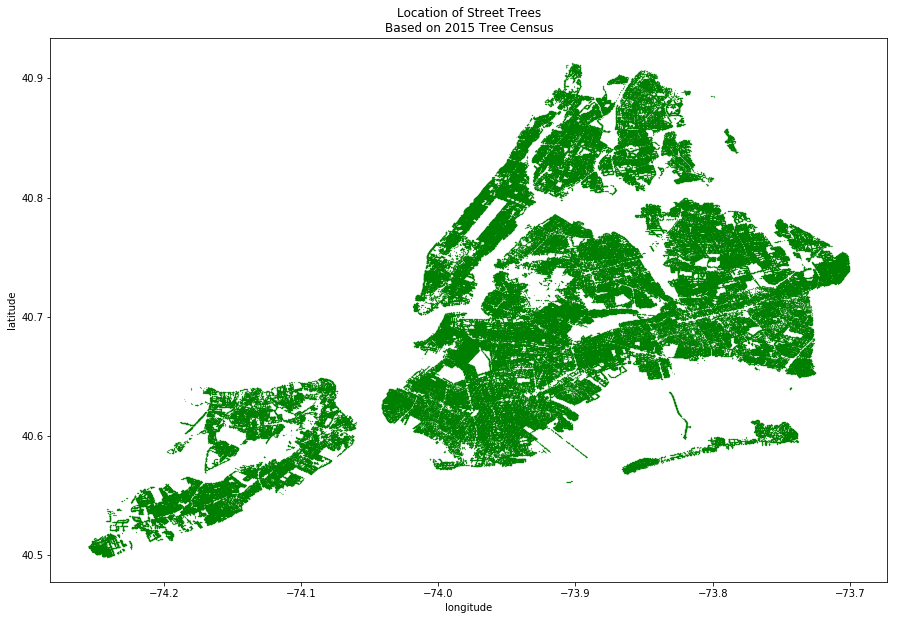

In [44]:
df_tree.plot(kind="scatter", figsize=(15,10), x="longitude", y="latitude", color="green", 
             s=0.02, title = "Location of Street Trees\nBased on 2015 Tree Census")

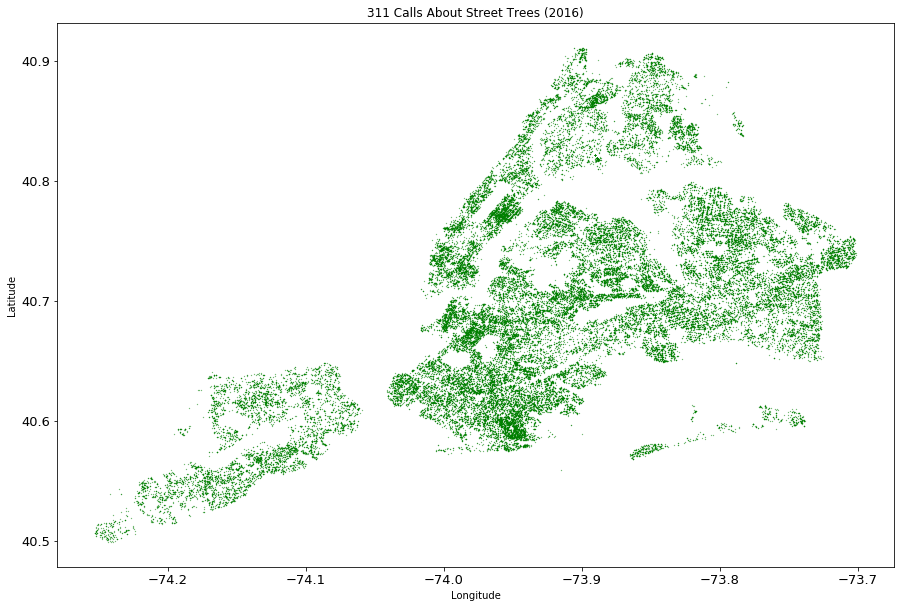

In [45]:
df_311.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(15,10), s=.05, color = "green",
            fontsize = 13, title = "311 Calls About Street Trees (2016)")

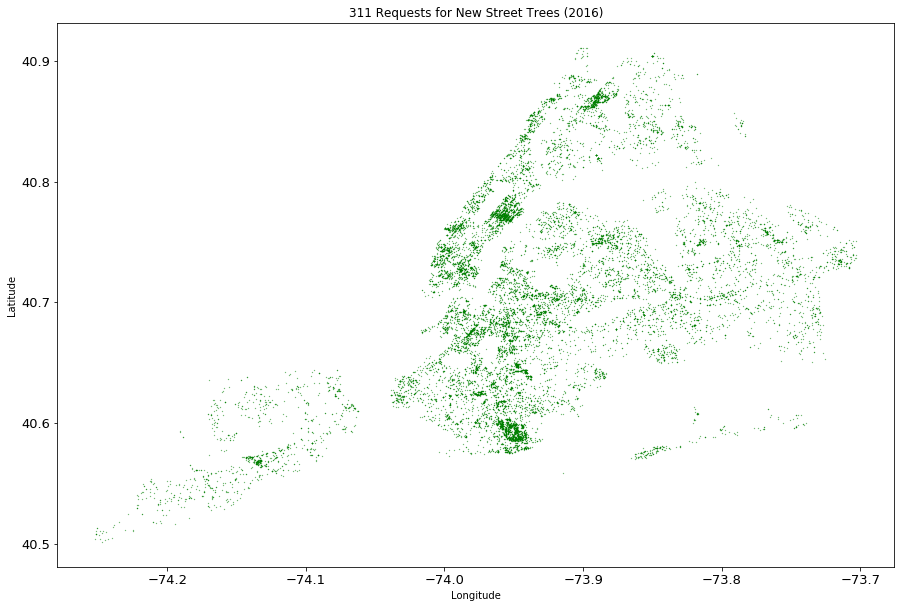

In [46]:
df_311_newtrees.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(15,10), s=.05, color = "green",
            fontsize = 13, title = "311 Requests for New Street Trees (2016)")

### 4. Analysis

This is split into four sections:
- All Calls
- Calls About Damaged Trees (The #1 top request) 
- Calls About New Trees (The #2 top request) 
- Calls from zip codes with above average calls per zip code

### ALL CALLS
##### Correlation between All Calls and Number of Trees

In [47]:
calls_per_tree.corr()

,Number of Trees,Number of Calls,Calls Per Tree
Number of Trees,1.000000,0.757435,0.030413
Number of Calls,0.757435,1.000000,0.528639
Calls Per Tree,0.030413,0.528639,1.000000


#### This shows that the correlation between the number of calls and the number of trees is ~0.76 - a strong correlation coefficient. This is expected. It makes logical sense that as the number of trees increases, the number of calls increases.

##### Correlation between All Calls and Average Stewardship 

In [48]:
steward = pd.concat([callszip['Unique Key'],df_tree_steward['steward']], axis=1)
steward.columns = ['Number of Calls', 'Avg Steward Score']
steward.head()

,Number of Calls,Avg Steward Score
10001,76.0,0.485882
10002,204.0,0.331325
10003,384.0,0.780751
10004,4.0,0.649573
10005,2.0,0.407692


In [49]:
steward.corr()

,Number of Calls,Avg Steward Score
Number of Calls,1.000000,-0.198996
Avg Steward Score,-0.198996,1.000000


#### "Steward" indicates if there are signs the community tends to the tree. I replaced categorical data (None, 1or2, etc) with numerical values (0, 1, 2, 3). 0 indicates no stewardship and 3 indicates significant stewardship. 

#### The correlation between average stewardship scores and number of calls per zip code is a weak negative correlation. Though it is weak, the fact that it it negative suggests that as stewardship increases, the number of calls decreases. 

### CALLS ABOUT DAMAGED TREES

In [50]:
df_311_damagedtrees_zip 

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Resolution Action Updated Date,Borough,Latitude,Longitude,Location
Incident Zip,,,,,,,,,,,,,,,,,,
10001,5,5,5,5,5,5,3,3,3,5,5,5,5,5,5,5,5,5
10002,41,41,37,41,41,41,22,34,34,41,41,41,41,39,41,41,41,41
10003,41,41,36,41,41,41,36,35,35,41,41,41,41,38,41,41,41,41
10004,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1
10007,4,4,4,4,4,4,1,3,3,4,4,4,4,4,4,4,4,4
10009,50,50,48,50,50,50,45,46,46,50,50,50,50,49,50,48,48,48
10010,17,17,16,17,17,17,16,11,11,17,17,17,17,17,17,17,17,17
10011,62,62,60,62,62,62,54,57,57,62,62,62,62,61,62,62,62,62
10012,19,19,18,19,19,19,16,14,14,19,19,19,19,19,19,19,19,19


In [51]:
damage_per_tree = pd.concat([treeszip['tree_id'],df_311_damagedtrees_zip['Unique Key']], axis=1)
damage_per_tree.columns = ['Number of Trees', 'Number of Damaged Tree Requests']
damage_per_tree.head()

,Number of Trees,Number of Damaged Tree Requests
10001,911.0,5.0
10002,2265.0,41.0
10003,2025.0,41.0
10004,118.0,1.0
10005,144.0,NaN


In [52]:
damage_per_tree.corr()

,Number of Trees,Number of Damaged Tree Requests
Number of Trees,1.000000,0.801825
Number of Damaged Tree Requests,0.801825,1.000000


#### The strong positive correlation shows that as the number of trees goes up, so too does the number of calls regarding damaged trees. This is to be expected. 

In [53]:
steward_damaged = pd.concat([df_311_damagedtrees_zip['Unique Key'],df_tree_steward['steward']], axis=1)
steward_damaged.columns = ['Number of Requests for Damaged Trees', 'Avg Steward Score']
steward_damaged.head()

,Number of Requests for Damaged Trees,Avg Steward Score
10001,5.0,0.485882
10002,41.0,0.331325
10003,41.0,0.780751
10004,1.0,0.649573
10005,NaN,0.407692


In [54]:
steward_damaged.corr()

,Number of Requests for Damaged Trees,Avg Steward Score
Number of Requests for Damaged Trees,1.000000,-0.338051
Avg Steward Score,-0.338051,1.000000


#### The correlation between stewardship and calls for damaged trees is a weak negative correlation. 

### CALLS ABOUT NEW TREES

##### Correlation between Calls Requests for New Trees and Number of Trees


In [55]:
new_calls_per_tree = pd.concat([treeszip['tree_id'],df_311_newtrees_zip['Unique Key']], axis=1)
new_calls_per_tree.columns = ['Number of Trees', 'Number of New Tree Requests']
new_calls_per_tree.head()

,Number of Trees,Number of New Tree Requests
10001,911.0,54.0
10002,2265.0,83.0
10003,2025.0,193.0
10004,118.0,2.0
10005,144.0,1.0


In [56]:
new_calls_per_tree.corr()

,Number of Trees,Number of New Tree Requests
Number of Trees,1.00000,0.28412
Number of New Tree Requests,0.28412,1.00000


#### There seems to be a weak correlation between the number of current trees and requests for new trees. It is positive however, thus potentially indicating that areas with many trees want more trees. 

##### Correlation between Call Requests for new trees and average stewardship

In [57]:
steward_new = pd.concat([df_311_newtrees_zip['Unique Key'],df_tree_steward['steward']], axis=1)
steward_new.columns = ['Number of Requests for New Trees', 'Avg Steward Score']
steward_new.head()

,Number of Requests for New Trees,Avg Steward Score
10001,54.0,0.485882
10002,83.0,0.331325
10003,193.0,0.780751
10004,2.0,0.649573
10005,1.0,0.407692


In [58]:
steward_new.corr()

,Number of Requests for New Trees,Avg Steward Score
Number of Requests for New Trees,1.000000,0.129632
Avg Steward Score,0.129632,1.000000


#### The result is a fairly weak positive correlation between a zip code's stewardship score and the number of requests for new trees from that zip code. This indicates there is not a material relationship between stewardship and requests for new trees.

### Calls from zip codes with above average calls per zip code

In [59]:
topzips.corr()

,Number of Trees,Number of Calls,Calls Per Tree
Number of Trees,1.000000,0.875035,-0.090914
Number of Calls,0.875035,1.000000,0.318324
Calls Per Tree,-0.090914,0.318324,1.000000


##### The correlation here between number of trees and number of calls is a strong positive correlation (~0.88). This demonstrates that as the number of trees increases, so does the number of calls. 

In [60]:
topzips['Avg Steward Score'] = steward['Avg Steward Score']

/Users/rspd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
topzips.corr()

,Number of Trees,Number of Calls,Calls Per Tree,Avg Steward Score
Number of Trees,1.000000,0.875035,-0.090914,-0.433408
Number of Calls,0.875035,1.000000,0.318324,-0.311051
Calls Per Tree,-0.090914,0.318324,1.000000,0.338790
Avg Steward Score,-0.433408,-0.311051,0.338790,1.000000


#### When looking at just the zip codes with above average calls per tree, you see different correlations. The correlation between number of calls and number of trees is a very strong positive correlation. The correlation between number of calls and average stewardship is a weak negative correlation. 

### 5. Discussion

#### How can an agency use findings to improve service delivery or performance?  What agency(ies) would be involved? 

**Agency:** The findings would be most useful for the Departments of Parks and Recreation (DPR). 

**Use:** As my findings showed, as the number of trees increases, so too does the number of calls. When the city plants new trees in a given area, they should also plan for increased resident service demand in that area. 

It could be expected that the requests for new trees would be strongly negatively correlated with the current number of trees, but that is not what these findings suggest. That indicates that even in areas with many trees, there may still be desire for more trees. For DPR, this means that they shouldn't rule out planting more trees in areas that already have high tree populations. 

It could be expected that stewardship would have a strong weak or positive correlation to the number of calls. (It could be weak: As the rates of stewardship go up, the number of calls go down because people are not reliant on the city. It could be positive: As the rates of stewardship go up, the number of calls go up because more people are concenred and paying attention to trees.) However, the results indicate that stewarship doesn't have a strong correlation in either direction. This means that DPR should probably not invest resources in fostering stewardship of trees, as it is unlikely to make a signficant impact on lowering service requests. 

Overall, when I began this analysis, I hypothesized there would be strong correlations between variables such as stewardship and the number of calls. As the results of this analysis do not produce signficant strong correlations, further analysis should be conducted.


#### What are the limitations of your approach? What could you do to improve it?

**Modelling:** Given greater modelling abilities, better insights may be able to be derived. As I gain new tools for analyses beyond correlation, I may be able to revisit this problem and apply a more impactful form of anlaysis (multivariate, kmeans, random forests, etc). 

Further, I would seek to understand how to better handle categorical data (such as tree species) to make predicitive models. 

**Temporal:** Further analyses could investigate the temporal component by utilizing the 2005 Tree Census and 311 Data to determine what level of increase or decrase there has been in the number of calls per tree or how the types of requests being made may have changed over time in certain geographies.

**Spatial:** Zip codes can be quite large. and do not correlate to any specific political entity in NYC (Council Districts, Community Boards, etc). It would  be ideal to break the data down to block or census tract levels, which are smaller and  provide more granular detail. Alongside this, better geographical visualizations could be created with more sophisticated mapping skills. 

**Bias:** As with all self-reported citizen data, there is likely a reporting bias. Particular demographics may be more or less likely to make a complaint to 311 about a given issue, thus skewing the results of any analysis that has underlying 311 data. An example in this instance: Homeowners may be more likley to report a damaged tree or to request a new tree than renters are. 

**Domain Knowledge:** It would be useful and helpful to understand how DPR currently prioritizes servicing and requests, so that a model could factor in their constraints. This knowledge would be obtained by meeting with DPR. 

**External Data:** There is also an opportunity to incorporate further datasets to better understand trends.